In [33]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [35]:
df = pd.read_csv("penguins.csv")
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [36]:
df = df.dropna() #usuwanie wartości NaN
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [37]:
label_encoder = LabelEncoder()
df['island'] = label_encoder.fit_transform(df['island'])
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,2,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,2,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,2,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,2,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,2,39.3,20.6,190.0,3650.0,male,2007


In [38]:
X = df.values[:, 1:6]
y = df.values[:, 0]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)


In [60]:
# obiekt klasyfikatora – liczba drzew i inne hiperparametry do optymalizacji
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X_train, y_train) # trenowanie klasyfikatora
y_test_pred = clf.predict(X_test)
# dokładność dla zbioru testowego
print('\nAccuracy (test):', accuracy_score(y_test, y_test_pred))



Accuracy (test): 0.97



Feature importances
island               0.082590
bill_length_mm       0.359903
bill_depth_mm        0.143707
flipper_length_mm    0.277146
body_mass_g          0.136654
dtype: float64


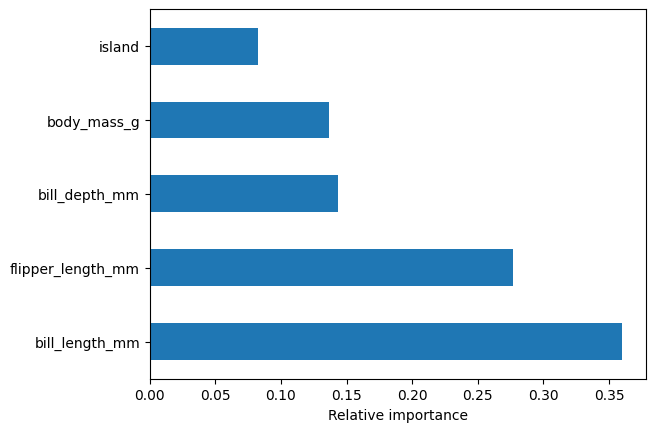

In [61]:
# Badanie istotności cech
print('\nFeature importances')
importances = pd.Series(clf.feature_importances_, index=df.columns[1:6])
print(importances)
importances.nlargest(5).plot(kind='barh')
plt.xlabel('Relative importance')
plt.show()


In [62]:
# Macierz pomyłek i raport z klasyfikacji
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[48  0  0]
 [ 3 20  0]
 [ 0  0 29]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       1.00      0.87      0.93        23
           2       1.00      1.00      1.00        29

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100



In [92]:
X = df.loc[:,['bill_length_mm', 'flipper_length_mm', 'bill_depth_mm']]
y = df.values[:, 0]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)


In [93]:
# obiekt klasyfikatora – liczba drzew i inne hiperparametry do optymalizacji
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X_train, y_train) # trenowanie klasyfikatora
y_test_pred = clf.predict(X_test)
# dokładność dla zbioru testowego
print('\nAccuracy (test):', accuracy_score(y_test, y_test_pred))


Accuracy (test): 0.97


In [96]:
# Badanie istotności cech
print('\nFeature importances')
importances = pd.Series(clf.feature_importances_, index=df.columns[2:4])
print(importances)
importances.nlargest(5).plot(kind='barh')
plt.xlabel('Relative importance')
plt.show()


Feature importances


ValueError: Length of values (3) does not match length of index (2)

In [68]:
# Macierz pomyłek i raport z klasyfikacji
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[47  1  0]
 [ 3 19  1]
 [ 0  0 29]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        48
           1       0.95      0.83      0.88        23
           2       0.97      1.00      0.98        29

    accuracy                           0.95       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.95      0.95       100



In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [70]:
pima = pd.read_csv('diabetes.csv')
print(pima.head())
X = pima.values[:, 0:8]
y = pima.values[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=1)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [91]:
clf = RandomForestClassifier(n_estimators = 18, max_depth=4)
clf = clf.fit(X_train,y_train) # trenowanie
y_test_pred = clf.predict(X_test) # predykcja dla zbioru testowego
print("Accuracy (test):",metrics.accuracy_score(y_test, y_test_pred))

Accuracy (test): 0.8008658008658008


In [75]:
# CV (cv=10), analiza AUC
score = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
print("Mean AUC score: ",score.mean())
print("Std AUC score: ",score.std())


Mean AUC score:  0.7610427350427351
Std AUC score:  0.06011332610621498


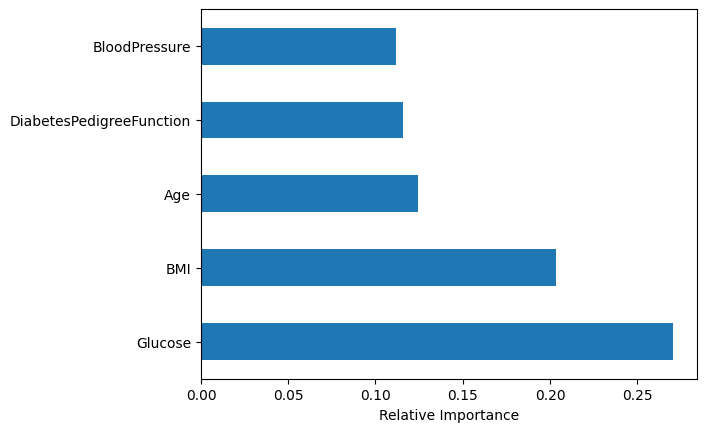

In [76]:
importances = pd.Series(clf.feature_importances_, index=pima.keys()[0:8])
importances.nlargest().plot(kind='barh')
plt.xlabel('Relative Importance')
plt.show()


In [100]:
X = pima.loc[:,['BloodPressure', 'DiabetesPedigreeFunction', 'SkinThickness', 'Insulin', 'Pregnancies']]
y = pima.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [108]:
clf = RandomForestClassifier(n_estimators = 10, max_depth=4)
clf = clf.fit(X_train,y_train) # trenowanie
y_test_pred = clf.predict(X_test) # predykcja dla zbioru testowego
print("Accuracy (test):",metrics.accuracy_score(y_test, y_test_pred))

Accuracy (test): 0.6190476190476191
